In [1]:
cd ..

/home/dmitriishubin/Desktop/Projects/mask


In [2]:
import pyvista as pv
from pyvista import examples
import numpy as np
import copy
import cv2
from time import time
import matplotlib.pyplot as plt

import pyvista as pv
import vtk

In [3]:
def trans_to_matrix(trans):
    """Convert a numpy.ndarray to a vtk.vtkMatrix4x4 """
    matrix = vtk.vtkMatrix4x4()
    for i in range(trans.shape[0]):
        for j in range(trans.shape[1]):
            matrix.SetElement(i, j, trans[i, j])
    return matrix

In [6]:
mesh = pv.read("./data/3d_models/half_ram/mask-low/source/rv6h86r8l3oj.obj")
tex = pv.read_texture("./data/3d_models/half_ram/mask-low/textures/Mask_low_Low_Mtl_BaseColor.png")

#center and scale
points = mesh.extract_feature_edges()
points = points.points
mesh.translate(-1*np.mean(points,axis=0))

points = mesh.extract_feature_edges()
points = points.points
mesh.scale(1/np.max(np.abs(points)))

axes = pv.Axes(show_actor=True, actor_scale=2.0, line_width=5)


#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)
#mesh.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)


poly = pv.PolyData(np.array([[-0.01, 0.125, 0.5], [-0.01, 0.125, -0.5]]))
#poly.plot(eye_dome_lighting=True)
#poly.plot(cpos='xy', jupyter_backend='ipygany', show_scalar_bar=True)

mesh.rotate_y(90, point=axes.origin)
#poly.rotate_y(90, point=axes.origin)

In [10]:
tex.

(Texture)0x7f1669accec0

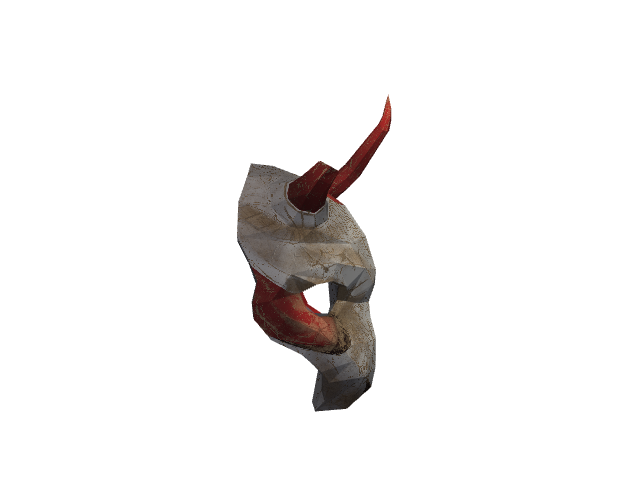

12.310408791002372


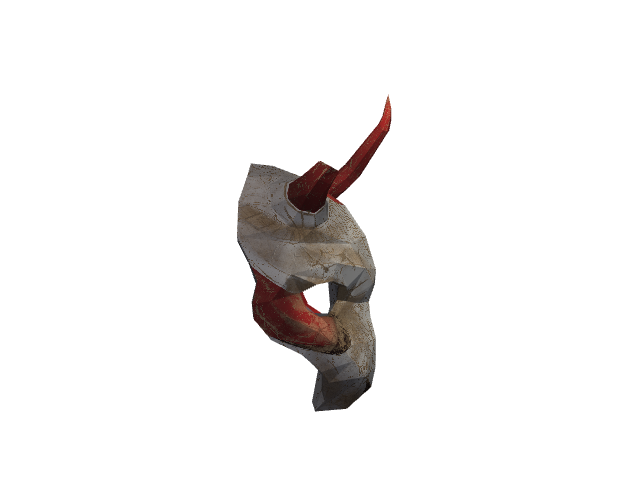

13.94369072116967


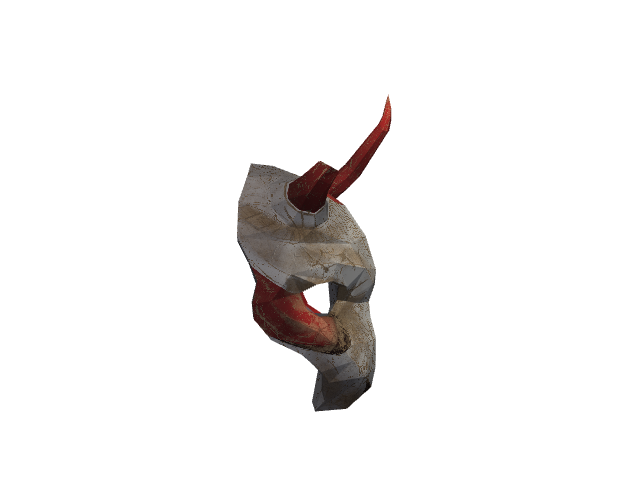

14.87721687806816


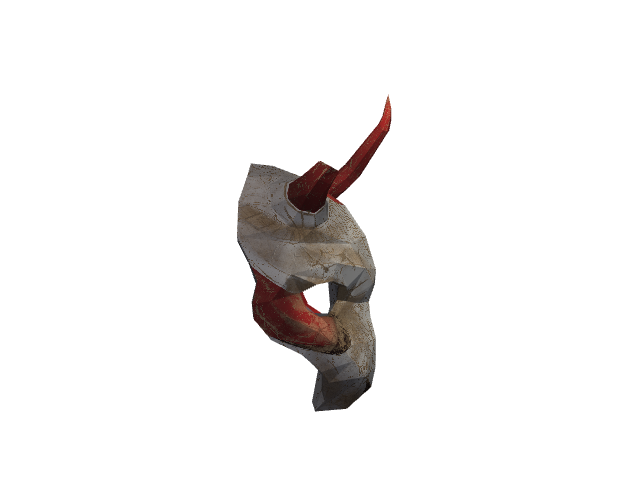

16.210747634654627


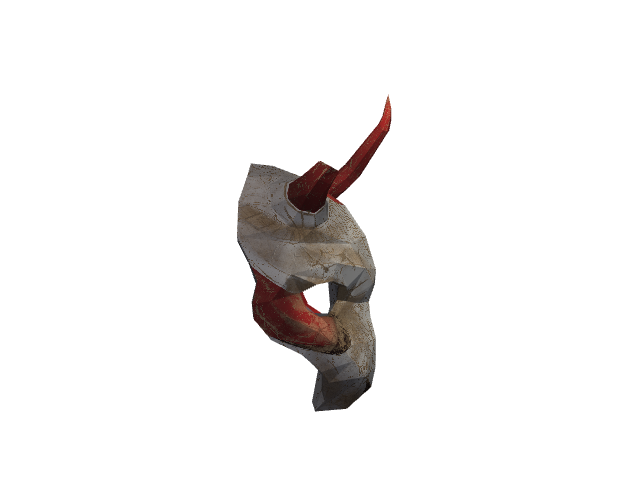

14.431815132006784


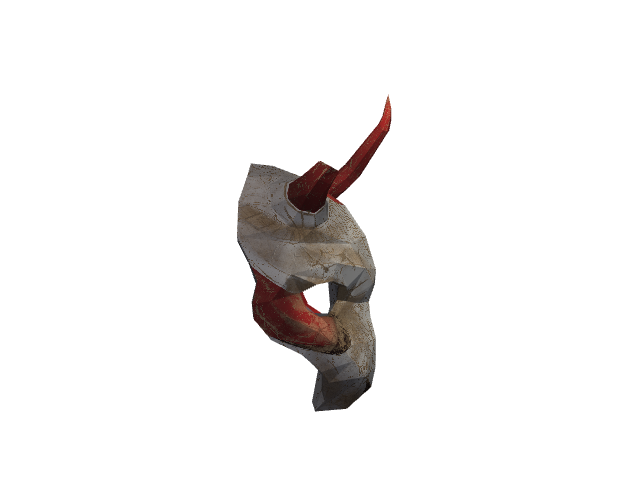

16.29767326194066


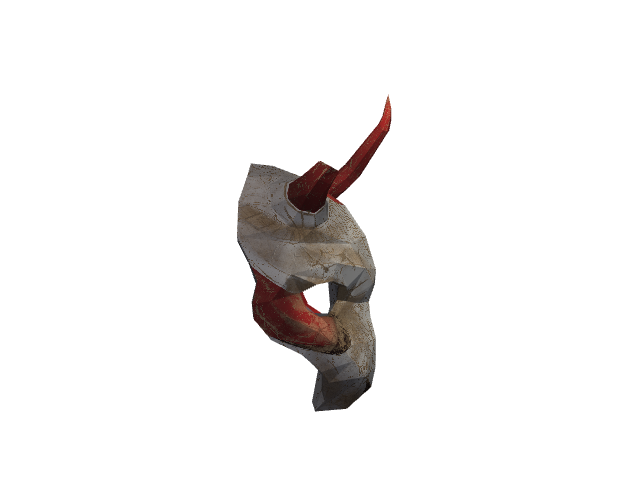

17.26001308604279


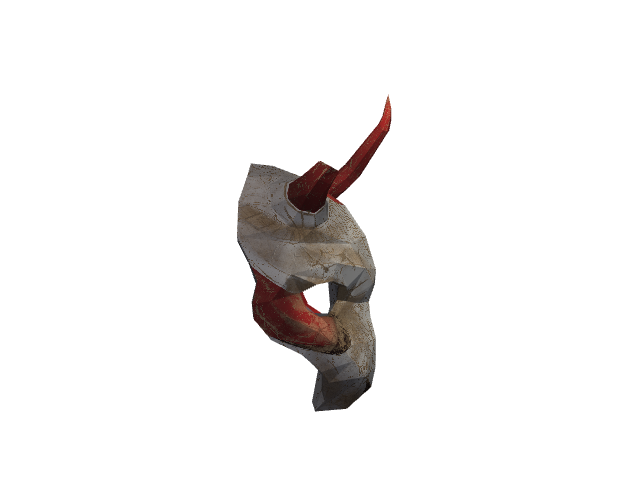

17.404039901077198


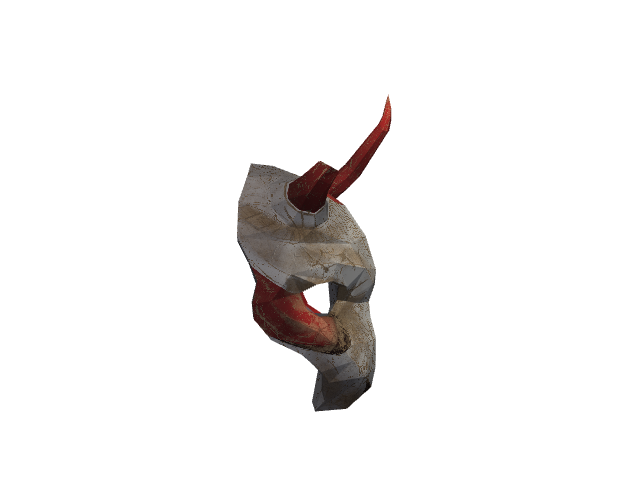

18.230555917764157


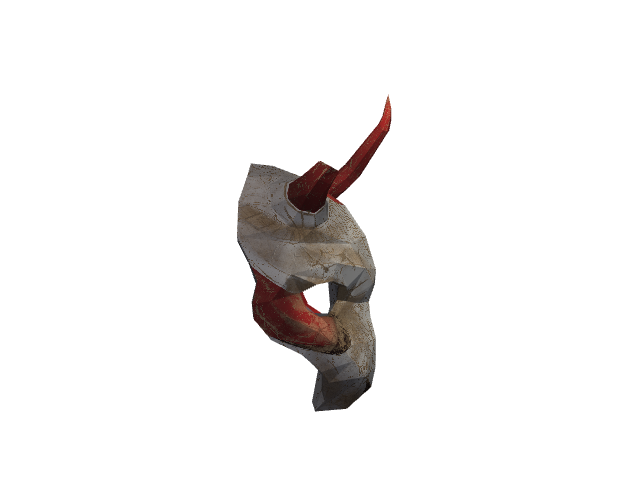

18.677544040897025


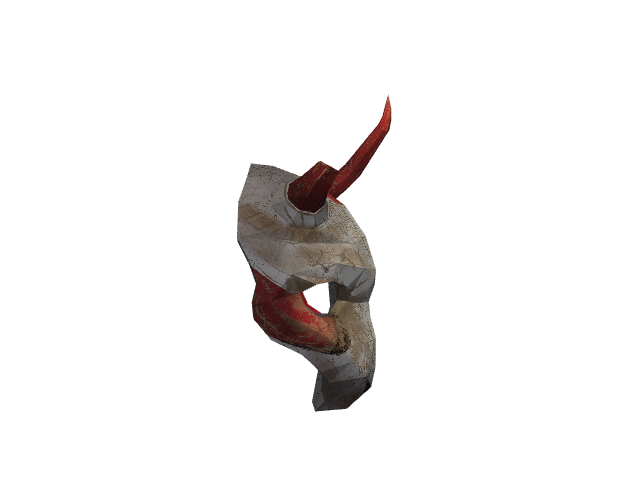

18.001150204719274


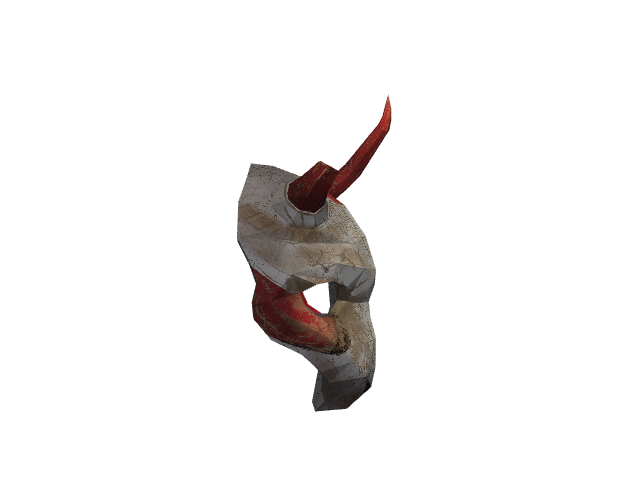

17.38542780637834


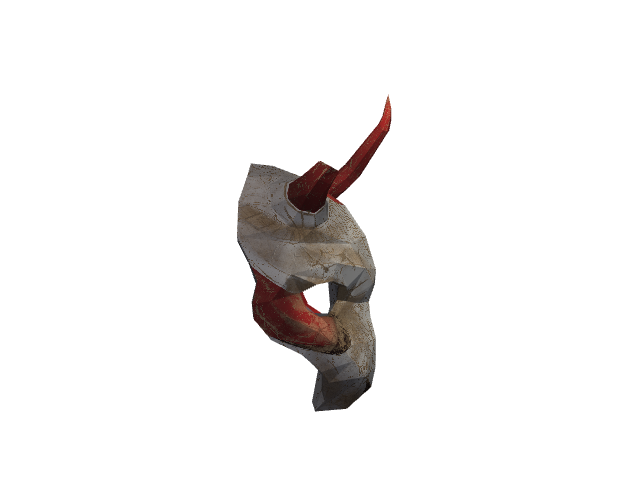

17.52328748809305


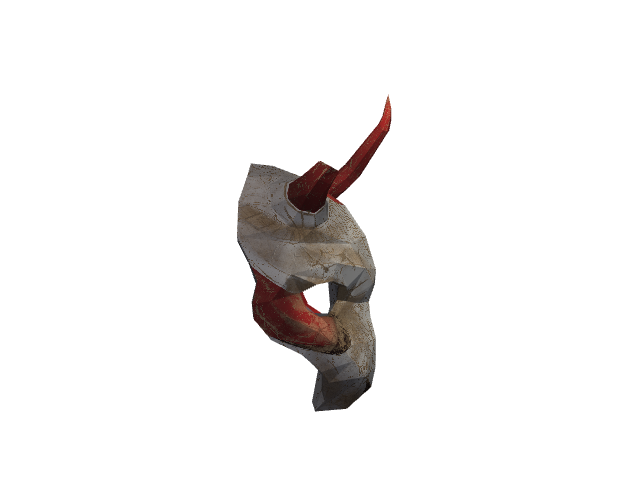

17.647595405394032


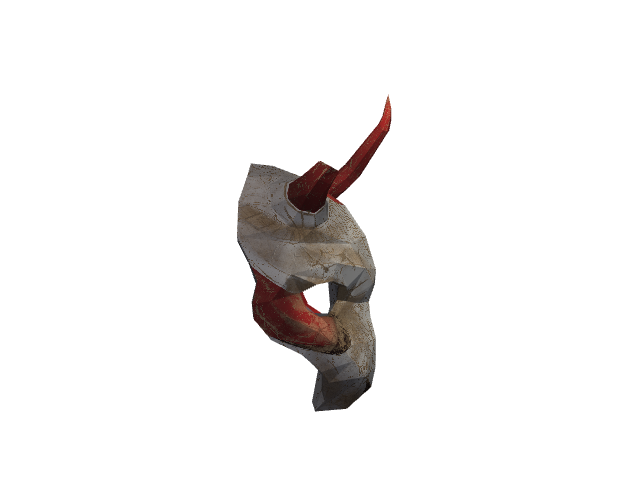

15.840832697580614


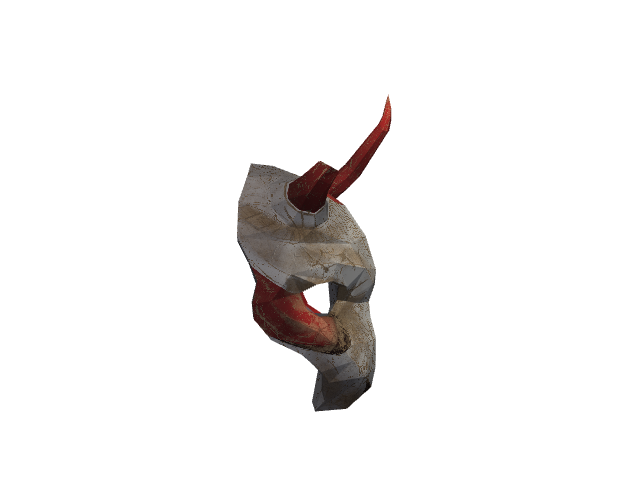

16.807267394100652


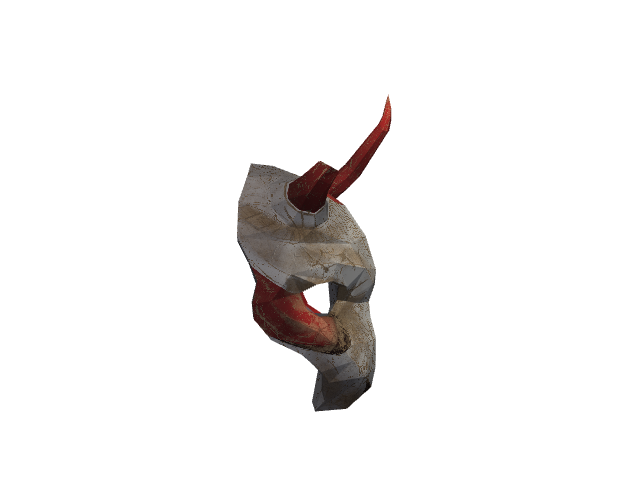

17.477868804640426


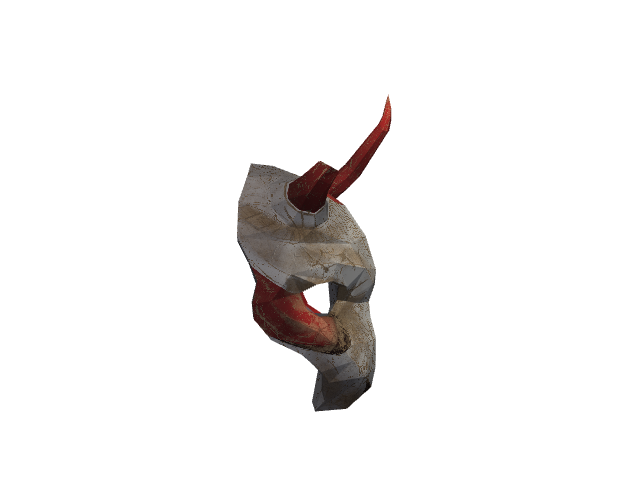

18.314778264894414


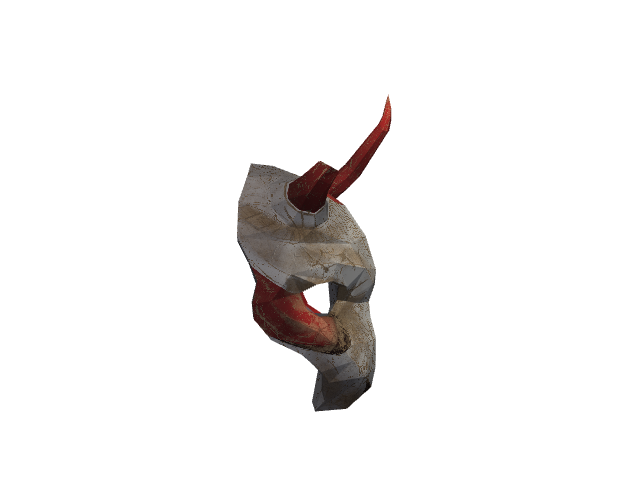

17.876704855428258


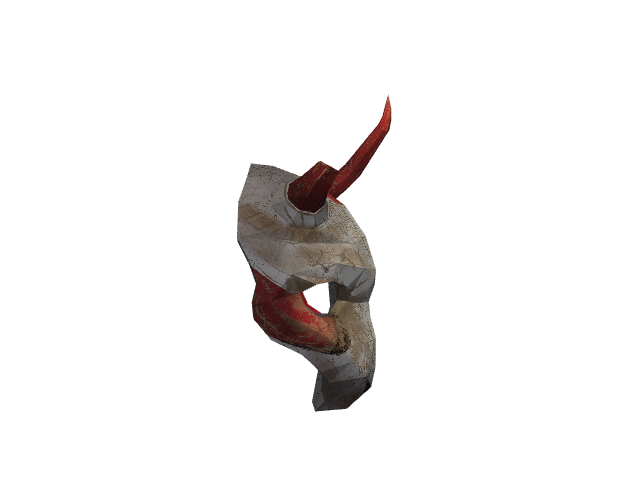

17.930506155950752


In [8]:


camera = pv.Camera()
camera.position = [0, 0, 10]



#camera.direction = (0, 0, 0)

near_range = 0.1
far_range = 10
camera.clipping_range = (near_range, far_range)
camera.view_angle = 16

modelTransform = np.array([
 [  1.,   0.,   0.,  -0.],
   [  0.,   1.,   0.,  -0.],
   [  0.,   0.,   1., -10.],
   [  0.,   0.,   0.,   1.]
], dtype=np.float32)


projTransform = np.array([
  [ 5.3365273,  0.       ,  0.       ,  0.       ],
       [ 0.       ,  7.11537  ,  0.       ,  0.       ],
       [ 0.       ,  0.       , -1.       , -0.2      ],
       [ 0.       ,  0.       , -1.       ,  0.       ]]
, dtype=np.float32)

# camera.SetModelTransformMatrix(trans_to_matrix(modelTransform))
# camera.SetExplicitProjectionTransformMatrix(trans_to_matrix(projTransform))
# camera.SetUseExplicitProjectionTransformMatrix(1)



for i in range(20):
    start = time()
    
    pl = pv.Plotter(off_screen=True)
    pl.window_size =  640,480
    pl.background_color = (1,1,1)
    pl.camera = camera
    
    mesh_r = mesh.copy()

    #mesh_r.rotate_x(60, point=axes.origin)
    
    #mesh.rotate_z(60, point=axes.origin)

    pl.add_mesh(mesh,texture=tex)
    
    #pl.add_mesh(mesh,color=[0.2,0.2,0.2])
    
    
    
    
    
    pl.show()
    img = pl.image

    print(1/(time()-start))
    
    

In [16]:
#points = poly.ex()
for i in range(np.asarray(poly.points).shape[0]):
    point = np.asarray(poly.points)[i]

    point = np.concatenate([point, np.ones(1)], axis=0)

    projection = np.matmul(np.matmul(projTransform, modelTransform), point)
    projection /= projection[-2]  # divide by Z
    projection[1] /= -1  # Y is negative
    projection[0] *= 640 // 2  # scale up
    projection[1] *= 480 // 2  # scale up

    print(int(640 // 2 + projection[0]), int(480 // 2 + projection[1]))

318 217
318 219


In [14]:
projection

array([ -1.65795021, -20.72437767,   1.        ,   1.01941746])

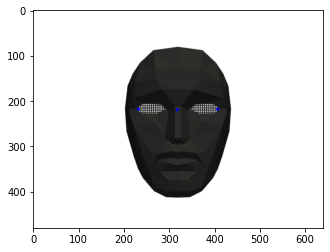

In [12]:
#img = np.transpose(img,(2,0,1))
img = np.ascontiguousarray(img, dtype=np.uint8)

img = cv2.circle(img, (407, 218), radius=2, color=(0, 0, 255), thickness=2)
img = cv2.circle(img, (318, 219), radius=2, color=(0, 0, 255), thickness=2)


plt.imshow(img)

In [ ]:
img.shape

In [ ]:
pl.camera.Ge()

In [ ]:
mtx = pl.camera.GetModelViewTransformMatrix()
mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
mtx = pl.camera.()
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
pl.camera.model_transform_matrix

In [ ]:
mtx = pl.camera.Ge
#mtx = pv.array_from_vtkmatrix(mtx)
mtx

In [ ]:
camera.model_transform_matrix

In [ ]:
camera.

In [ ]:
camera.model_transform_matrix

In [ ]:


points = mesh.extract_feature_edges()
points = points.points

In [13]:
import open3d as o3d
from utils.mask import Mask
import yaml

config  =yaml.load(open('./config.yml'))

mask = Mask(config=config['mesh_params'], frame_size=(640,480))

mesh = o3d.io.read_triangle_mesh("./data/3d_models/Mask.stl")
mesh.compute_vertex_normals()

mesh = mesh.translate(-1 * mesh.get_center())
mesh = mesh.scale(
    1 / np.max(np.abs(np.asarray(mesh.vertices))), center=mesh.get_center()
)


R = mesh.get_rotation_matrix_from_xyz((0, np.pi / 2, 0))
mesh.rotate(R, center=(0, 0, 0))

mask.render.scene.add_geometry("rotated_model", mesh, mask.mtl)

image = mask.render.render_to_image()
image = cv2.cvtColor(np.array(image), cv2.COLOR_RGBA2RGB)


plt.imshow(image)

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


/home/dmitriishubin/anaconda3/envs/mask/lib/python3.7/site-packages/ipykernel_launcher.py:5: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  """


AttributeError: 'Mask' object has no attribute 'render'

In [ ]:
image

In [ ]:
image.shape

In [ ]:
mask.render.scene.camera.get_view_matrix()

In [ ]:
o3d.visualization.draw_geometries([mesh])


In [ ]:
mesh.textures = o3d.geometry.Image(img)

In [ ]:
mesh.triangle_uvs = o3d.utility.Vector2dVector(img)
o3d.visualization.draw_geometries([mesh])